In [ ]:
!unzip 'customer-segmentation-dataset.zip'

Archive:  customer-segmentation-dataset.zip
   creating: customer-segmentation-dataset/
  inflating: customer-segmentation-dataset/Mall_Customers.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
mall_df=pd.read_csv('/content/customer-segmentation-dataset/Mall_Customers.csv')
mall_df.head(16)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## **EXPLORATORY DATA ANALYSIS**

In [ ]:
mall_df.shape

(200, 5)

In [ ]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#We can remove CustomerID since it does not seem much useful
mall_df=mall_df.drop('CustomerID',axis=1)

In [ ]:
sns.set_style('darkgrid')

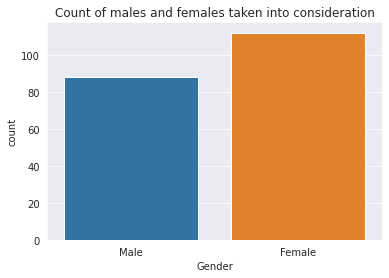

In [ ]:
#Analyzing the number of males and females taken into consideration
sns.countplot(x='Gender',data=mall_df)
plt.title('Count of males and females taken into consideration')
plt.savefig('Count of males and females taken into consideration.png')
plt.show()

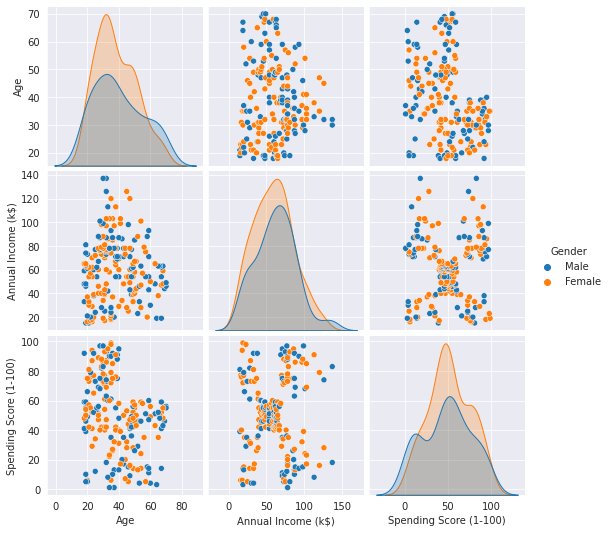

In [ ]:
sns.pairplot(mall_df,hue='Gender')
plt.savefig('pairplot.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

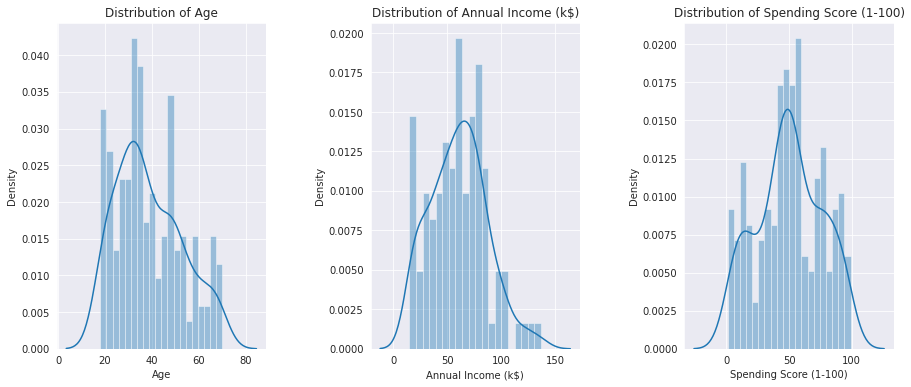

In [ ]:
plt.figure(1,figsize=(15,6))
n=0
cols=['Age','Annual Income (k$)','Spending Score (1-100)']
for x in cols:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(wspace=0.5,hspace=0.5)
  sns.distplot(mall_df[x],bins=20)
  plt.title('Distribution of {}'.format(x))
  plt.savefig('Distribution of {}.png'.format(x))
plt.show();

<Figure size 576x432 with 0 Axes>

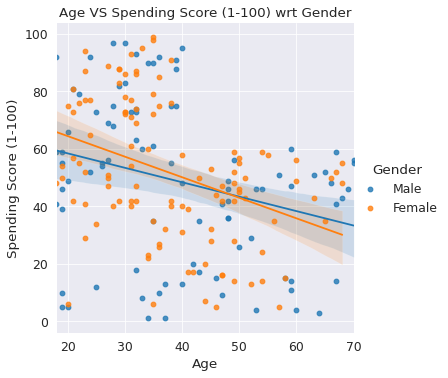

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='Age',y='Spending Score (1-100)',data=mall_df,hue='Gender')
plt.title('Age VS Spending Score (1-100) wrt Gender')
plt.show()

*From the above graph its clear that the spending scores are really high for the people aged between 20-40.After 40,the spending scores of the people are all below 60.*

<Figure size 576x432 with 0 Axes>

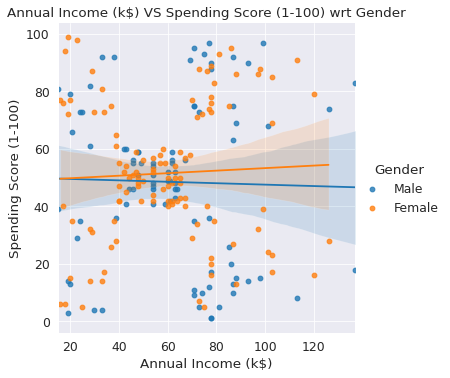

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_df,hue='Gender')
plt.title('Annual Income (k$) VS Spending Score (1-100) wrt Gender')
plt.show()

*The above graph shows that people who earn between 40k$-60k$ have a spending score that is between 40-60.The category of people other than this range have their spending scores spread all over and there is no particular pattern.*

*From the above graphs,it is also clear that 'Gender' has no specific role in segmenting customers.Thus we can remove it.*

In [ ]:
mall_df=mall_df.drop('Gender',axis=1)

In [ ]:
mall_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## **SEGMENTATION USING K-MEANS**

**1.CLUSTERING USING 'AGE' AND 'SPENDING SCORES(1-100):'**

In [ ]:
df1=mall_df.loc[:,['Age','Spending Score (1-100)']].values

In [ ]:
df1[:10]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72]])

In [ ]:
clusters=[] #to segment the customers into different clusters
#We can select a 'k-value' between 1-10
for k in range(1,11):
  kmns=KMeans(n_clusters=k,init='k-means++')
  kmns.fit(df1)
  clusters.append(kmns.inertia_)

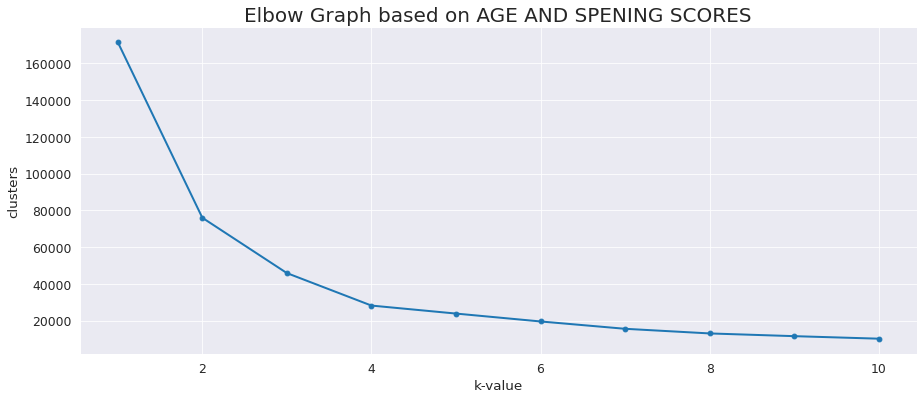

In [ ]:
#Plotting the ELBOW CURVE to choose an optimum K-value
plt.figure(figsize=(15,6))
plt.plot(range(1,11),clusters,linewidth=2,marker='o')
plt.title('Elbow Graph based on AGE AND SPENING SCORES',fontsize=20)
plt.xlabel('k-value')
plt.ylabel('clusters')
plt.savefig('Elbow Graph based on AGE AND SPENING SCORES.png')
plt.show()

*The elbow of the elbow graph represents the best value of k,thus k=4.*

In [ ]:
#Now performing K-Means using 4 clusters
kmns=KMeans(n_clusters=4)
labels=kmns.fit_predict(df1) 
print(labels)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


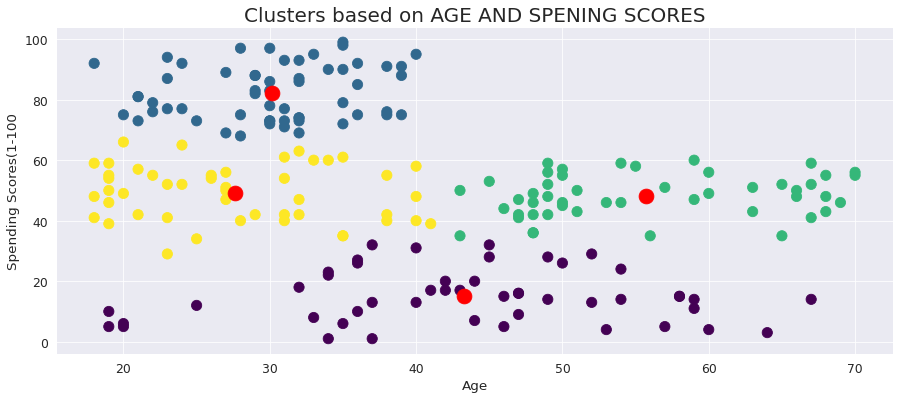

In [ ]:
#Visualizing the clusters
plt.figure(figsize=(15,6))
plt.scatter(df1[:,0],df1[:,1],c=kmns.labels_,s=105,cmap='viridis') #visualizing the data points into various clusters
plt.scatter(kmns.cluster_centers_[:,0],kmns.cluster_centers_[:,1],color='red',s=220)
plt.title('Clusters based on AGE AND SPENING SCORES',fontsize=20)
plt.xlabel('Age')
plt.ylabel('Spending Scores(1-100')
plt.savefig('Clusters based on AGE AND SPENING SCORES.png')
plt.show()

*Similarly we can perform using the other parameters too.*

**2.CLUSTERING USING 'AGE' AND 'ANNUAL INCOME(K$)':**

In [ ]:
df2=mall_df.loc[:,['Age','Annual Income (k$)']].values

In [ ]:
df2[:10]

array([[19, 15],
       [21, 15],
       [20, 16],
       [23, 16],
       [31, 17],
       [22, 17],
       [35, 18],
       [23, 18],
       [64, 19],
       [30, 19]])

In [ ]:
cluster2=[]
for k in range(1,11):
  kmns2=KMeans(n_clusters=k,init='k-means++')
  kmns2.fit(df2)
  cluster2.append(kmns2.inertia_)

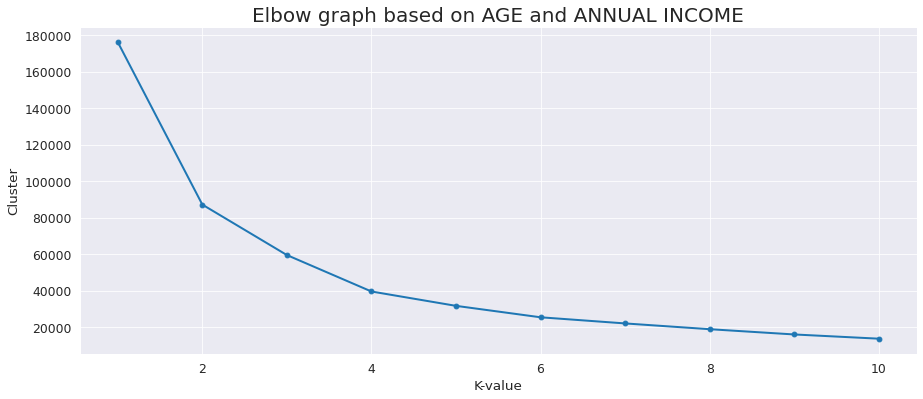

In [ ]:
#creating the elbow graph
plt.figure(figsize=(15,6))
plt.plot(range(1,11),cluster2,linewidth=2,marker='o')
plt.title('Elbow graph based on AGE and ANNUAL INCOME',fontsize=20)
plt.xlabel('K-value')
plt.ylabel('Cluster')
plt.savefig('Elbow graph based on AGE and ANNUAL INCOME.png')
plt.show()

*Here again the elbow is formed at k-value=4*

In [ ]:
kmns2=KMeans(n_clusters=4)
labels2=kmns2.fit_predict(df2)
print(labels2)

[1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1
 1 1 1 3 1 3 1 3 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 0 3 3 0 3 3 3 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


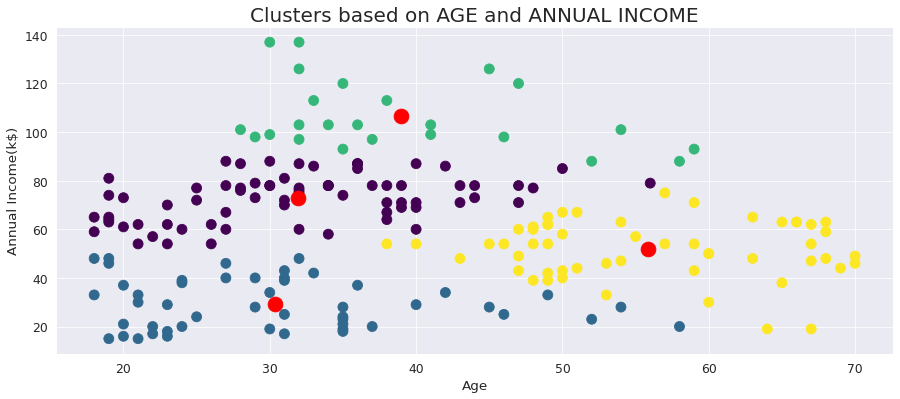

In [ ]:
#Visualizing the clusters
plt.figure(figsize=(15,6))
plt.scatter(df2[:,0],df2[:,1],c=kmns2.labels_,cmap='viridis',s=100)
plt.scatter(kmns2.cluster_centers_[:,0],kmns2.cluster_centers_[:,1],color='red',s=220)
plt.title('Clusters based on AGE and ANNUAL INCOME',fontsize=20)
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
plt.savefig('Clusters based on AGE and ANNUAL INCOME.png')
plt.show()

**3.CLUSTERING USING 'ANNUAL INCOME(K$)' AND 'SPENDING SCORES(1-100)':**

In [ ]:
df3=mall_df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [ ]:
df3[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [ ]:
cluster3=[]
for k in range(1,11):
  kmns3=KMeans(n_clusters=k,init='k-means++')
  kmns3.fit(df3)
  cluster3.append(kmns3.inertia_)

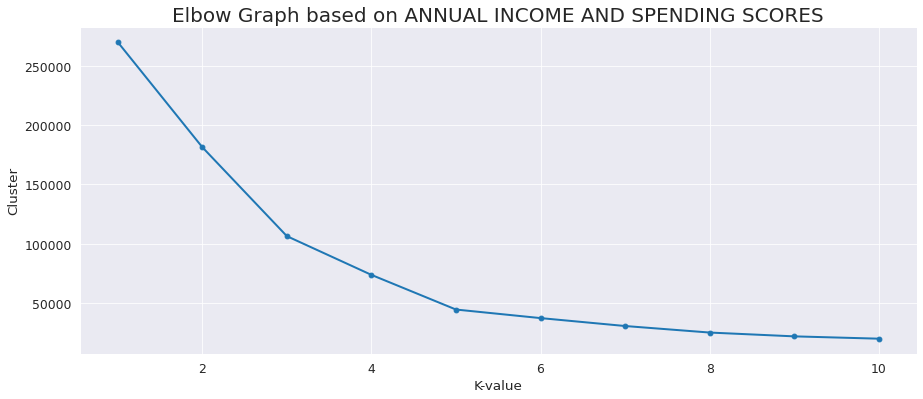

In [ ]:
#Now creating the elbow plot
plt.figure(figsize=(15,6))
plt.plot(range(1,11),cluster3,marker='o',linewidth=2)
plt.title('Elbow Graph based on ANNUAL INCOME AND SPENDING SCORES',fontsize=20)
plt.xlabel('K-value')
plt.ylabel('Cluster')
plt.savefig('Elbow Graph based on ANNUAL INCOME AND SPENDING SCORES.png')
plt.show()

*Here elbow is formed at k-value=5.*

In [ ]:
#Thus creating KMeans with 5 clusters
kmns3=KMeans(n_clusters=5)
label3=kmns3.fit_predict(df3)
print(label3)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


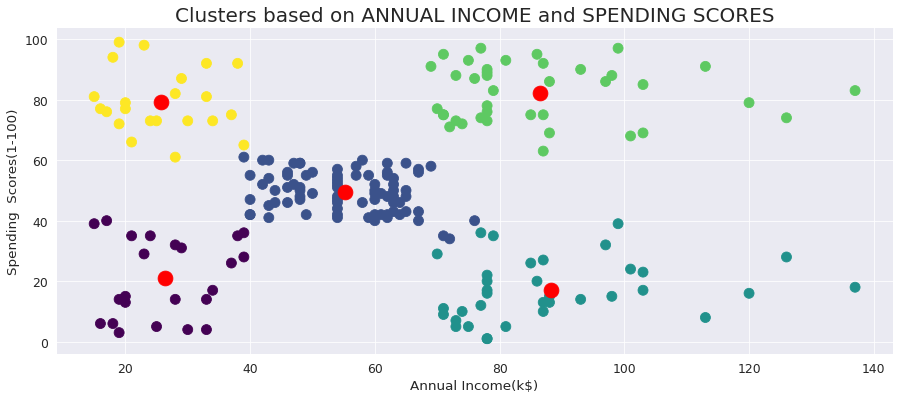

In [ ]:
#Visualizing the clusters
plt.figure(figsize=(15,6))
plt.scatter(df3[:,0],df3[:,1],c=kmns3.labels_,cmap='viridis',s=100)
plt.scatter(kmns3.cluster_centers_[:,0],kmns3.cluster_centers_[:,1],color='red',s=220)
plt.title('Clusters based on ANNUAL INCOME and SPENDING SCORES',fontsize=20)
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending  Scores(1-100)')
plt.savefig('Clusters based on ANNUAL INCOME and SPENDING SCORES.png')
plt.show()

 **RESULT:From the above three ways that clustering is done, it can be seen that when ANNUAL INCOME and SPENDING SCORES parameters are taken together,with number of clusters=5,clustering is done very efficiently.Thus these two parameters can be taken into consideration.**

**Thus the various clusters that the customers can be divided into based on their ANNUAL INCOMES AND SPENDING SCORES are:**

<ol>
  <b>
  <li>Customers having annual income:20kdollars-40kdollars and spending scores:0-40.</li>
  <li>Customers having annual income:20kdollars-40kdollars and spending scores:60-100.</li>
  <li>Customers having annual income:40kdollars-70kdollars and spending scores:40-60.</li>
  <li>Customers having annual income:70kdollars-140kdollars and spending scores:0-40.</li>
  <li>Customers having annual income:70kdollars-140kdollars and spending scores:60-100.</li>
  </b>
</ol>